In [9]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

In [10]:
pd.set_option('display.max_columns', None)
sns.set(style="whitegrid")

In [11]:
df = pd.read_csv(r'C:\Users\USER\Desktop\lendingdata\german_credit_data.csv')

In [12]:
df.describe(include='all')   # Display summary statistics for all columns and grouped by variable too

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
count,1000.000000,1000.000000,1000,1000.000000,1000,817,606,1000.000000,1000.000000,1000,1000
unique,NaN,NaN,2,NaN,3,4,3,NaN,NaN,8,2
top,NaN,NaN,male,NaN,own,little,little,NaN,NaN,car,good
freq,NaN,NaN,690,NaN,713,603,274,NaN,NaN,337,700
mean,499.500000,35.546000,NaN,1.904000,NaN,NaN,NaN,3271.258000,20.903000,NaN,NaN
std,288.819436,11.375469,NaN,0.653614,NaN,NaN,NaN,2822.736876,12.058814,NaN,NaN
min,0.000000,19.000000,NaN,0.000000,NaN,NaN,NaN,250.000000,4.000000,NaN,NaN
25%,249.750000,27.000000,NaN,2.000000,NaN,NaN,NaN,1365.500000,12.000000,NaN,NaN
50%,499.500000,33.000000,NaN,2.000000,NaN,NaN,NaN,2319.500000,18.000000,NaN,NaN
75%,749.250000,42.000000,NaN,2.000000,NaN,NaN,NaN,3972.250000,24.000000,NaN,NaN


In [13]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Unnamed: 0,1000.0,NaN,NaN,NaN,499.5,288.819436,0.0,249.75,499.5,749.25,999.0
Age,1000.0,NaN,NaN,NaN,35.546,11.375469,19.0,27.0,33.0,42.0,75.0
Sex,1000,2,male,690,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Job,1000.0,NaN,NaN,NaN,1.904,0.653614,0.0,2.0,2.0,2.0,3.0
Housing,1000,3,own,713,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Saving accounts,817,4,little,603,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Checking account,606,3,little,274,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Credit amount,1000.0,NaN,NaN,NaN,3271.258,2822.736876,250.0,1365.5,2319.5,3972.25,18424.0
Duration,1000.0,NaN,NaN,NaN,20.903,12.058814,4.0,12.0,18.0,24.0,72.0
Purpose,1000,8,car,337,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
df["Job"].unique()  # Check unique values in 'Job' column

array([2, 1, 3, 0])

In [15]:
df.isna().sum()     # Check for missing values in each column

Unnamed: 0            0
Age                   0
Sex                   0
Job                   0
Housing               0
Saving accounts     183
Checking account    394
Credit amount         0
Duration              0
Purpose               0
Risk                  0
dtype: int64

In [16]:
df.duplicated().sum()  # Check for duplicate rows

np.int64(0)

In [17]:
df= df.dropna().reset_index(drop=True)  # Drop missing values and reset index

In [18]:
df # see the number of rows and columns we deleted

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
1,3,45,male,2,free,little,little,7882,42,furniture/equipment,good
2,4,53,male,2,free,little,little,4870,24,car,bad
3,7,35,male,3,rent,little,moderate,6948,36,car,good
4,9,28,male,3,own,little,moderate,5234,30,car,bad
...,...,...,...,...,...,...,...,...,...,...,...
517,989,48,male,1,own,little,moderate,1743,24,radio/TV,good
518,993,30,male,3,own,little,little,3959,36,furniture/equipment,good
519,996,40,male,3,own,little,little,3857,30,car,good
520,998,23,male,2,free,little,little,1845,45,radio/TV,bad


In [19]:
df.columns

Index(['Unnamed: 0', 'Age', 'Sex', 'Job', 'Housing', 'Saving accounts',
       'Checking account', 'Credit amount', 'Duration', 'Purpose', 'Risk'],
      dtype='object')

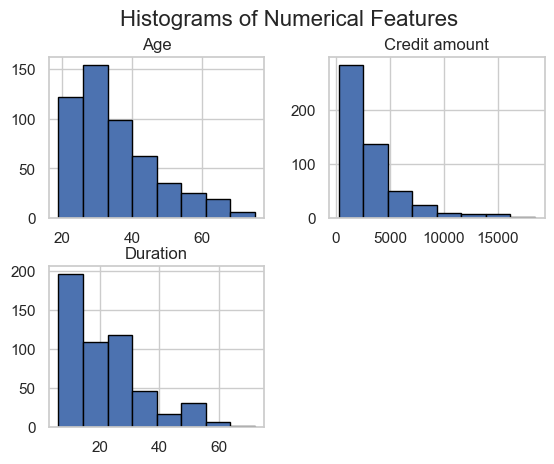

In [20]:
df[['Age', 'Credit amount', 'Duration']].hist(bins=8, edgecolor='black')  # selext numerical columns to plot, then use hist function
plt.suptitle('Histograms of Numerical Features', fontsize=16) #title
plt.show()  # removes the array type output when we run only above 2 lines

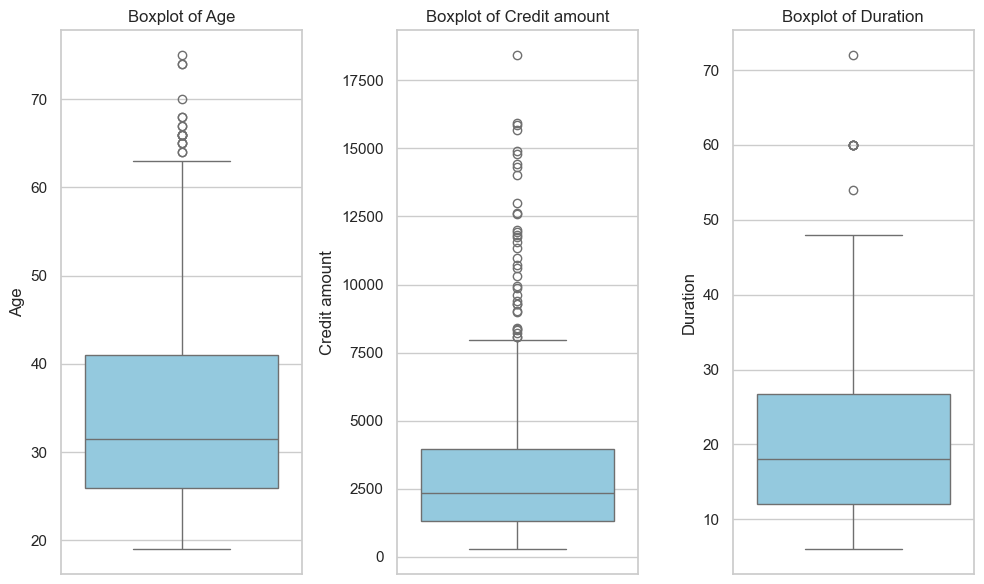

In [21]:
plt.figure(figsize=(10,6))                          
for i, col in enumerate(['Age', 'Credit amount', 'Duration']): #loop through the numerical columns
    plt.subplot(1, 3, i+1)                                     #create subplots
    sns.boxplot(y=df[col], color='skyblue')                    #boxplot for each numerical column
    plt.title(f'Boxplot of {col}')                             #title for each subplot

plt.tight_layout()
plt.show()                         #shows the boxplots

In [22]:
df.query('Duration >= 60')  

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
18,29,63,male,2,own,little,little,6836,60,business,bad
176,332,24,female,3,own,moderate,moderate,7408,60,car,bad
199,374,60,female,3,free,moderate,moderate,14782,60,vacation/others,bad
358,677,24,male,2,own,moderate,moderate,5595,72,radio/TV,bad
378,714,27,male,3,own,little,moderate,14027,60,car,bad
489,938,42,male,2,free,little,moderate,6288,60,education,bad
507,973,36,male,2,rent,little,little,7297,60,business,bad


In [23]:
Categorial_columns = ["Sex", "Job", "Housing", "Saving accounts", "Checking account", "Purpose"]

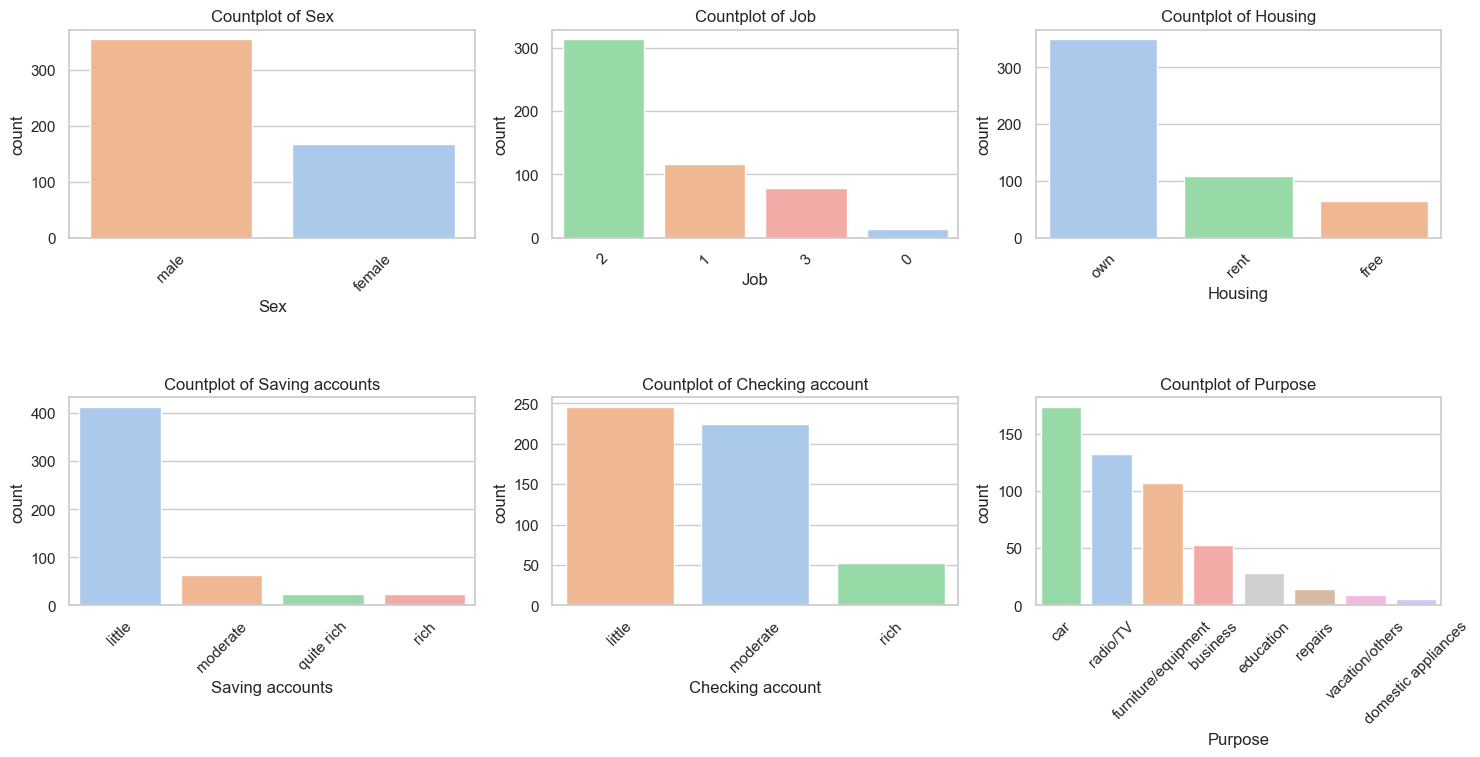

In [24]:
plt.figure(figsize=(15,10))
for i,col in enumerate(Categorial_columns):
    plt.subplot(3,3,i+1)
    sns.countplot(data = df, x=col,hue=col,legend=False,palette= 'pastel',order=df[col].value_counts().index)
    plt.title(f'Countplot of {col}')
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [25]:
corr =df[['Age','Job', 'Credit amount', 'Duration']].corr()

In [26]:
corr

,Age,Job,Credit amount,Duration
Age,1.000000,0.039771,0.082014,0.001549
Job,0.039771,1.000000,0.334721,0.200794
Credit amount,0.082014,0.334721,1.000000,0.613298
Duration,0.001549,0.200794,0.613298,1.000000


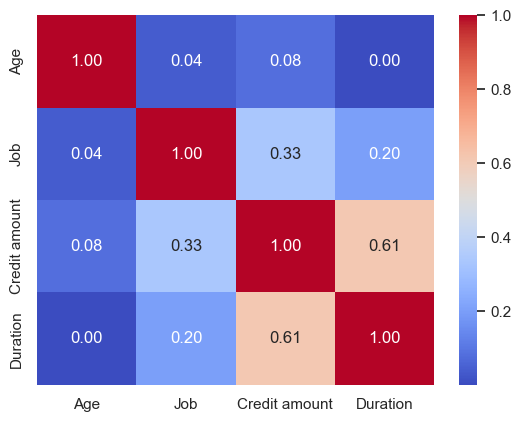

In [27]:
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.show()

In [28]:
df.groupby('Job')['Credit amount'].mean()

Job
0    1767.857143
1    2250.715517
2    3129.130990
3    5648.784810
Name: Credit amount, dtype: float64

In [29]:
df.groupby('Sex')['Credit amount'].mean()

Sex
female    2937.202381
male      3440.833333
Name: Credit amount, dtype: float64

In [30]:
pd.pivot_table(df, values='Credit amount', index='Housing', columns='Purpose')

Purpose,business,car,domestic appliances,education,furniture/equipment,radio/TV,repairs,vacation/others
Housing,,,,,,,,
free,4705.000000,5180.314286,NaN,5314.250000,4419.444444,2097.000000,1190.0,7842.666667
own,3725.973684,3120.485437,1333.5,2625.076923,3031.100000,2307.613861,2993.5,10321.833333
rent,6180.833333,3398.285714,NaN,2627.857143,2890.285714,2138.000000,2384.0,NaN


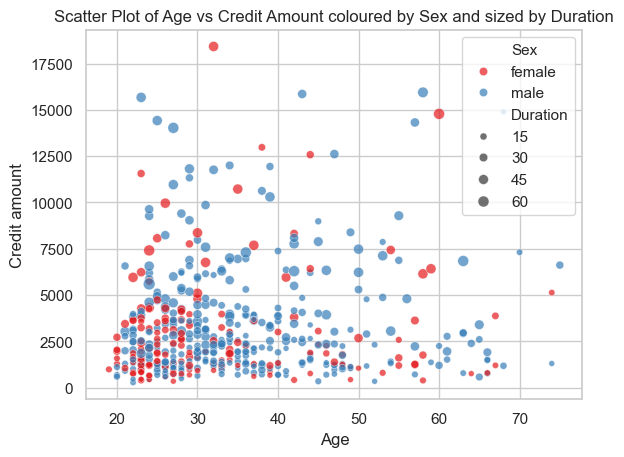

In [31]:
sns.scatterplot(data=df, x='Age', y='Credit amount', hue='Sex', size='Duration',alpha=0.7,palette='Set1')
plt.title('Scatter Plot of Age vs Credit Amount coloured by Sex and sized by Duration')
plt.show()

C:\Users\USER\AppData\Local\Temp\ipykernel_15948\2639096442.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Saving accounts', y='Credit amount', data=df, palette='Pastel1')


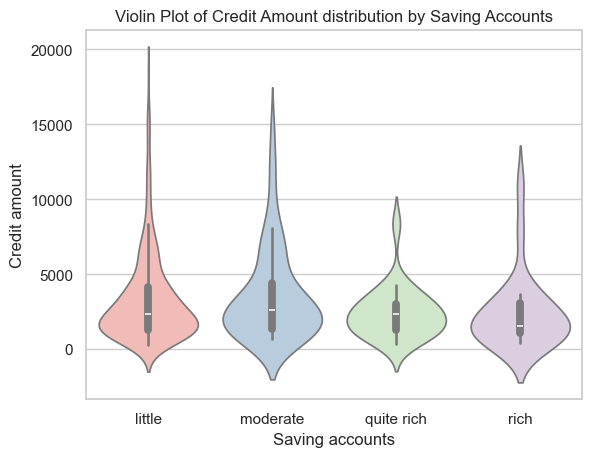

In [32]:
sns.violinplot(x='Saving accounts', y='Credit amount', data=df, palette='Pastel1')
plt.title('Violin Plot of Credit Amount distribution by Saving Accounts')
plt.show()

In [33]:
df['Risk'].value_counts(normalize=True)*100

Risk
good    55.747126
bad     44.252874
Name: proportion, dtype: float64

C:\Users\USER\AppData\Local\Temp\ipykernel_15948\2838287920.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Risk', y =col, data=df, palette='Set2')
C:\Users\USER\AppData\Local\Temp\ipykernel_15948\2838287920.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Risk', y =col, data=df, palette='Set2')
C:\Users\USER\AppData\Local\Temp\ipykernel_15948\2838287920.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Risk', y =col, data=df, palette='Set2')


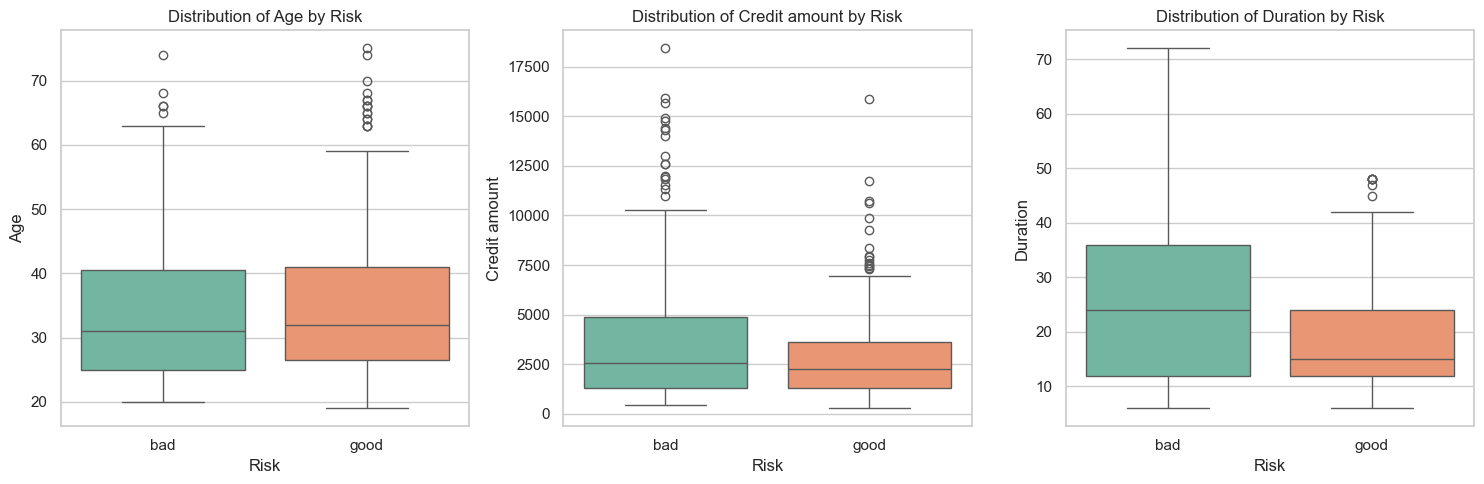

In [34]:
plt.figure(figsize=(15,5)) 
for i,col in enumerate(['Age', 'Credit amount', 'Duration']):
    plt.subplot(1,3,i+1)
    sns.boxplot(x='Risk', y =col, data=df, palette='Set2')
    plt.title(f'Distribution of {col} by Risk')
plt.tight_layout()
plt.show()

In [35]:
df.groupby('Risk')[['Job','Age','Credit amount','Duration']].mean()

,Job,Age,Credit amount,Duration
Risk,,,,
bad,1.913420,34.147186,3881.090909,25.445887
good,1.845361,35.477663,2800.594502,18.079038


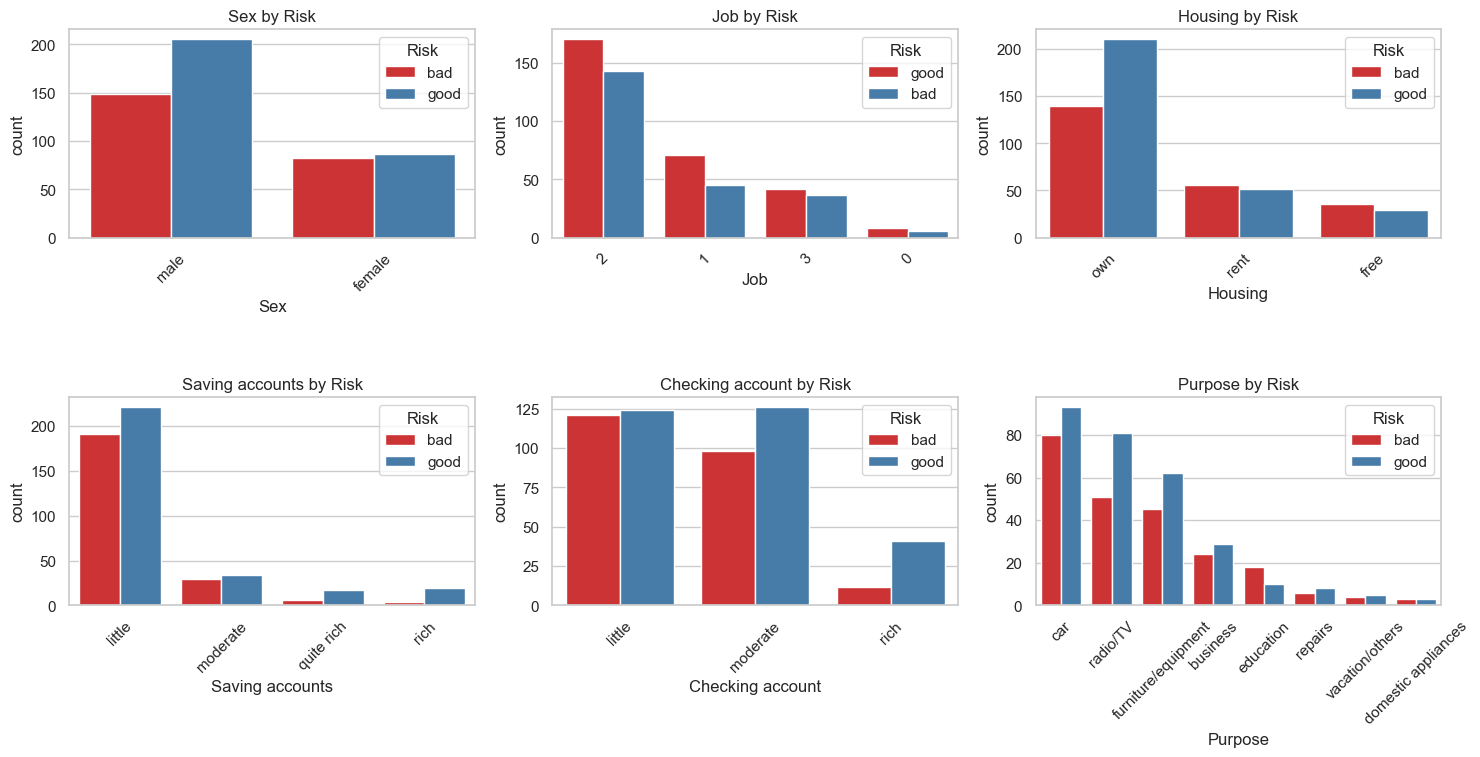

In [36]:
plt.figure(figsize=(15,10))
for i,col in enumerate(Categorial_columns):
    plt.subplot(3,3,i+1)
    sns.countplot(data=df,x=col,hue='Risk', palette='Set1', order=df[col].value_counts().index)
    plt.title(f'{col} by Risk')
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [37]:
df.columns

Index(['Unnamed: 0', 'Age', 'Sex', 'Job', 'Housing', 'Saving accounts',
       'Checking account', 'Credit amount', 'Duration', 'Purpose', 'Risk'],
      dtype='object')

In [38]:
features=['Sex', 'Job', 'Housing', 'Saving accounts', 'Checking account', 'Purpose', 'Age', 'Credit amount', 'Duration']

In [39]:
target='Risk'

In [40]:
df_model=df[features + [target]].copy()

In [41]:
df_model.head()

,Sex,Job,Housing,Saving accounts,Checking account,Purpose,Age,Credit amount,Duration,Risk
0,female,2,own,little,moderate,radio/TV,22,5951,48,bad
1,male,2,free,little,little,furniture/equipment,45,7882,42,good
2,male,2,free,little,little,car,53,4870,24,bad
3,male,3,rent,little,moderate,car,35,6948,36,good
4,male,3,own,little,moderate,car,28,5234,30,bad


In [42]:

from sklearn.preprocessing import LabelEncoder
import joblib

In [43]:
Cat_cols= df_model.select_dtypes(include='object').columns.drop('Risk')

In [44]:
le_dict = {}

In [45]:
Cat_cols

Index(['Sex', 'Housing', 'Saving accounts', 'Checking account', 'Purpose'], dtype='object')

In [46]:
for col in Cat_cols:
    le = LabelEncoder()
    df_model[col] = le.fit_transform(df_model[col])
    le_dict[col] = le
    joblib.dump(le, f'le_{col}.pkl')  # Save each LabelEncoder for future use 

In [47]:
le_target = LabelEncoder()

In [48]:
df_model[target]=le_target.fit_transform(df_model[target]) 

In [49]:
df_model[target].value_counts()

Risk
1    291
0    231
Name: count, dtype: int64

In [50]:
joblib.dump(le_target, 'target_encoder.pkl')  # Save the target LabelEncoder for future use

['target_encoder.pkl']

In [51]:
df_model.head() 

,Sex,Job,Housing,Saving accounts,Checking account,Purpose,Age,Credit amount,Duration,Risk
0,0,2,1,0,1,5,22,5951,48,0
1,1,2,0,0,0,4,45,7882,42,1
2,1,2,0,0,0,1,53,4870,24,0
3,1,3,2,0,1,1,35,6948,36,1
4,1,3,1,0,1,1,28,5234,30,0


In [52]:
from sklearn.model_selection import train_test_split    

In [53]:
X= df_model.drop(columns=target, axis=1)

In [54]:
y=df_model[target]

In [55]:
X

,Sex,Job,Housing,Saving accounts,Checking account,Purpose,Age,Credit amount,Duration
0,0,2,1,0,1,5,22,5951,48
1,1,2,0,0,0,4,45,7882,42
2,1,2,0,0,0,1,53,4870,24
3,1,3,2,0,1,1,35,6948,36
4,1,3,1,0,1,1,28,5234,30
...,...,...,...,...,...,...,...,...,...
517,1,1,1,0,1,5,48,1743,24
518,1,3,1,0,0,4,30,3959,36
519,1,3,1,0,0,1,40,3857,30
520,1,2,0,0,0,5,23,1845,45


In [56]:
y

0      0
1      1
2      0
3      1
4      0
      ..
517    1
518    1
519    1
520    0
521    1
Name: Risk, Length: 522, dtype: int64

In [57]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1, stratify=y)

In [58]:
X_train.shape

(417, 9)

In [59]:
X_test.shape

(105, 9)

In [60]:
%pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [61]:

from sklearn.tree import DecisionTreeClassifier 

from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

In [62]:
def train_model(model, param_grid, X_train, y_train, X_test, y_test):
    grid = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, n_jobs=-1, scoring='accuracy')
    grid.fit(X_train, y_train)
    
    best_model = grid.best_estimator_
    y_pred = best_model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    
    return best_model, acc,grid.best_params_

In [63]:
dt= DecisionTreeClassifier(random_state=1,class_weight='balanced')
dt_param_grid = {
    'max_depth':[3,5,7,10,None],
    'min_samples_split':[2,5,10],
    'min_samples_leaf':[1,2,4]
}

In [65]:
best_dt,acc_dt,params_dt = train_model(dt, dt_param_grid, X_train, y_train, X_test, y_test)

In [67]:
print(f'Best Decision Tree Model Accuracy: {acc_dt:.4f}')

Best Decision Tree Model Accuracy: 0.6000


In [69]:
print('best params:',params_dt)

best params: {'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 2}


In [71]:
rf = RandomForestClassifier(random_state=1,class_weight='balanced',n_jobs=-1)

In [73]:
rf_param_grid = {
    'n_estimators':[100,200],
    'max_depth':[5,7,10,None],
    'min_samples_split':[2,5,10],
    'min_samples_leaf':[1,2,4]
}

In [74]:
best_rf,acc_rf,params_rf = train_model(rf, rf_param_grid, X_train, y_train, X_test, y_test)

In [76]:
print('random forest Accuracy', acc_rf)

random forest Accuracy 0.6571428571428571


In [78]:
print('Best params:', params_rf)

Best params: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 100}


In [80]:
et = ExtraTreesClassifier(random_state=1,class_weight='balanced',n_jobs=-1)


In [82]:
et_param_grid = {
    'n_estimators':[100,200],
    'max_depth':[5,7,10,None],
    'min_samples_split':[2,5,10],
    'min_samples_leaf':[1,2,4]
}

In [83]:
best_et,acc_et,params_et = train_model(et, et_param_grid, X_train, y_train, X_test, y_test)

In [85]:
print('extra trees Accuracy', acc_et)

extra trees Accuracy 0.6761904761904762


In [87]:
print('best params:', params_et)

best params: {'max_depth': 7, 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 100}


In [89]:
xgb = XGBClassifier(random_state=1,scale_pos_weight= (y_train==0).sum() / (y_train==1).sum(),use_label_encoder=False,eval_metric='logloss')

In [91]:
xgb_param_grid = {
    'n_estimators':[100,200],
    'max_depth':[3,5,7],
    'learning_rate':[0.01,0.1,0.2],
    'subsample':[0.6,0.1],
    'colsample_bytree':[0.7,1]  
    }

In [92]:
best_xgb, acc_xgb, params_xgb = train_model(xgb, xgb_param_grid, X_train, y_train, X_test, y_test)

c:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\training.py:199: UserWarning: [17:43:52] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


In [94]:
print('xgboost accuracy', acc_xgb)

xgboost accuracy 0.6190476190476191


In [96]:
print('best params:', params_et)

best params: {'max_depth': 7, 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 100}


In [98]:
best_et.predict(X_test)

array([1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1])

In [101]:
joblib.dump(best_et, 'extratrees_credit_model.pkl')  # Save the best model for future use

['extratrees_credit_model.pkl']

In [105]:
print(X.columns.tolist())

['Sex', 'Job', 'Housing', 'Saving accounts', 'Checking account', 'Purpose', 'Age', 'Credit amount', 'Duration']
